In [32]:
from ultralytics import YOLOv10
from PIL import Image
import numpy as np
import supervision as sv
model = YOLOv10('best.pt')

In [21]:


# Load the image
image = Image.open("oyster_test.jpg")

# Convert the image to a NumPy array
image_array = np.array(image)

# Print the shape of the array
print(image_array.shape)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

(416, 416, 3)



0: 640x640 3 oysters, 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


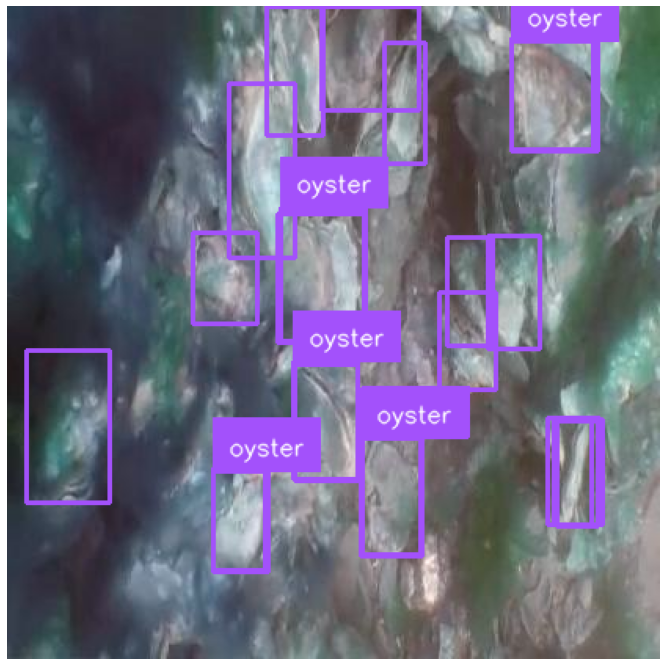

In [30]:

results = model(image_array, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)
annotated_image = bounding_box_annotator.annotate(
    scene=image_array, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)


In [31]:
print(type(image_array))

<class 'numpy.ndarray'>


In [20]:
print(type(model))

<class 'ultralytics.models.yolov10.model.YOLOv10'>
